## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Reading the data into python
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
NoOfRows = df.shape[0]
NoOfRows

294478

c. The number of unique users in the dataset.

In [5]:
NoOfUniqueUser = df['user_id'].nunique()
NoOfUniqueUser

290584

d. The proportion of users converted.

In [6]:
NoOfConverted = df.query('converted == 1')['user_id'].count()
ProportionConverted = (NoOfConverted/NoOfRows)*100
ProportionConverted

11.965919355605511

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page')) == True].shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum().any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [3]:
#Backing up dataframe df into df2
df2 = df
#Finding rows where treatment not aligned with new page
temp_df = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
#Deleting selected rows
df2.drop(temp_df.index, inplace=True)
#Finding rows where control not aligned with old page
temp_df = df[((df['group'] == 'control') == (df['landing_page'] == 'old_page')) == False]
#Deleting those selected rows
df2.drop(temp_df.index, inplace=True)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
temp_df = df2['user_id'].value_counts().apply(lambda x: x>1)
temp_df.head()

773192     True
630732    False
811737    False
797392    False
795345    False
Name: user_id, dtype: bool

c. What is the row information for the repeat **user_id**? 

In [4]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [5]:
#Checking data types of the columns in dataframe
df2.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [6]:
#Converting timestamp column to actual timestamp
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

In [7]:
#Reviewing the datatypes again to notice change.
df2.dtypes

user_id                  int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
dtype: object

In [8]:
#Randomly choosing row to remove
temp_df = df2[(df2['timestamp'] =='2017-01-09 05:37:58.781806') & (df2['user_id']==773192)]
#A temporary backup of dataframe if required
tdf2=df2
#Droping duplicate row
df2.drop(temp_df.index, inplace=True)

In [9]:
#Review whether row is removed
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
NewTotalUser = df2['user_id'].count()
NoOfConverted = df2.query('converted == 1')['user_id'].count()
print("Probability of Individual Converting: ",(NoOfConverted/NewTotalUser))

Probability of Individual Converting:  0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [63]:
ControlGroup = df2.query('group == "control"')['user_id'].count()
ControlGroupConverted = df2.query('converted == 1 and group=="control"')['user_id'].count()
print("Probability of Control Group Converted: ",(ControlGroupConverted/ControlGroup))
ctrl_conv_rt = (ControlGroupConverted/ControlGroup)

Probability of Control Group Converted:  0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [64]:
ControlTrtmtConverted = df2.query('group == "treatment" and converted ==1')['user_id'].count()
print("Probability of Treatment Group Converted: ",(ControlTrtmtConverted/ControlGroup))
trtmt_conv_rt = (ControlTrtmtConverted/ControlGroup)

Probability of Treatment Group Converted:  0.118837507056


d. What is the probability that an individual received the new page?

In [22]:
TotalNewPage = df2.query('landing_page == "new_page"')['user_id'].count()
print("Probability of New Page: ",(TotalNewPage/NewTotalUser))

Probability of New Page:  0.500061944223


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No.  Infact Old Page convertion rate(12%) is higher than New Page convertion rate(11.88%).  New Page is only getting closer to Old Page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> **$H_{0}$ = $p_{new}$ - $p_{old}$ <= 0** ==>  Old Page conversion is better or equal to new page.<br><br>
> **$H_{1}$ = $p_{new}$ - $p_{old}$ > 0** ==> New Page conversion is greater than old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
#As per assumption above
OldConverted = df2.query('converted == 1')['user_id'].count() 
HNull = (OldConverted/NewTotalUser)
print("Null Convert Rate: ",HNull)

Null Convert Rate:  0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
#As per assumption that "All have equal convertion rate"
NewConverted = df2.query('converted == 1')['user_id'].count() 
HAlte = (NewConverted/NewTotalUser)
print("Alternate Convert Rate: ",HAlte)

Alternate Convert Rate:  0.119597087245


c. What is $n_{new}$?

In [25]:
NewPage = df2.query('landing_page=="new_page"')['user_id'].count()
NewPage

145310

d. What is $n_{old}$?

In [26]:
OldPage = df2.query('landing_page=="old_page"')['user_id'].count()
OldPage

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
#Creating transaction list array with value of 1's and 0's with probability rate of Pnew which is 12%
new_page_converted = np.random.choice([1,0], size=NewPage, p=[0.12, 0.88])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
#Creating transaction list array with value of 1's and 0's with probability rate of Pold which is 12%
old_page_converted = np.random.choice([1,0], size=OldPage, p=[0.12, 0.88])
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [65]:
obs_diff = trtmt_conv_rt - ctrl_conv_rt
obs_diff

-0.0015487974448284009

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [67]:
p_diffs = np.random.binomial(NewPage, p_new, 10000)/NewPage - np.random.binomial(OldPage, p_old, 10000)/OldPage

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [68]:
diffs = np.array(p_diffs)

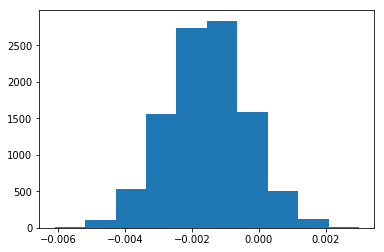

In [69]:
plt.hist(diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [71]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

In [72]:
(null_vals > obs_diff).mean()

0.90329999999999999

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**'P' value is calculated in j with p-value = 0.9 > 0.05.  Therefore Null Hypothesis can be accepted.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [14]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1')['user_id'].count()
convert_new = df2.query('landing_page=="new_page" and converted==1')['user_id'].count()
n_old = df2.query('landing_page=="old_page"')['user_id'].count()
n_new = df2.query('landing_page=="new_page"')['user_id'].count()
convert_old, convert_new, n_old, n_new

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [15]:
z_score, p_value = sm.stats.proportions_ztest([17489,17264],[145274,145310],alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Yes.  with P value of 0.1898 we can still say it favours Alternate Hypothesis,  Therefore Null Hypothesis can be rejected.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Multiple Linear Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [10]:
#Backing up the dataframe just in case
backup_df2 = df2

In [11]:
#Adding intercept column to dataframe
df2['intercept'] = 1

In [12]:
#Adding ab_page column and setting up its value
df2['ab_page'] = np.where(df2['group']=="control", 0,1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [16]:
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Sat, 17 Feb 2018   Prob (F-statistic):              0.190
Time:                        18:47:39   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>**'P' value for ab_page is 0.190.**<br><br>
>**Null and Hypotheses of Regression Model**<br>
>$H_0$ = intercept = 0<br>
>$H_1$ = intercept != 0<br><br>
>$H_0$ = ab_page = 0<br>
>$H_1$ = ab_page != 0<br><br>

> **The difference between P value of Part II and Part III is because in Part II we had only one NULL and ALTERNATE hypothesis where in Part III both NULL and ALTERNATE have pre-defined hypothesis like where equal to 0 or Not Equal to 0.** (Regression is a effect or two sided test)